In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('big mart sales data.csv')
data.shape

(8523, 46)

In [2]:
x=data.drop(['Item_Outlet_Sales'],axis=1)
y=data['Item_Outlet_Sales']
x.shape,y.shape

((8523, 45), (8523,))

In [3]:
# Linear regression
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=56)

In [4]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae
# create instance for linear regression
lr=LR()
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
train_predict=lr.predict(train_x)
k=mae(train_predict,train_y)
print('Training mean absolute error  ',k)

Training mean absolute error   821.4206146753685


In [6]:
test_predict=lr.predict(test_x)
k=mae(test_predict,test_y)
print('Testing mean absolute error  ',k)

Testing mean absolute error   875.2688982985248


Text(0.5, 1.0, 'Coefficients plot')

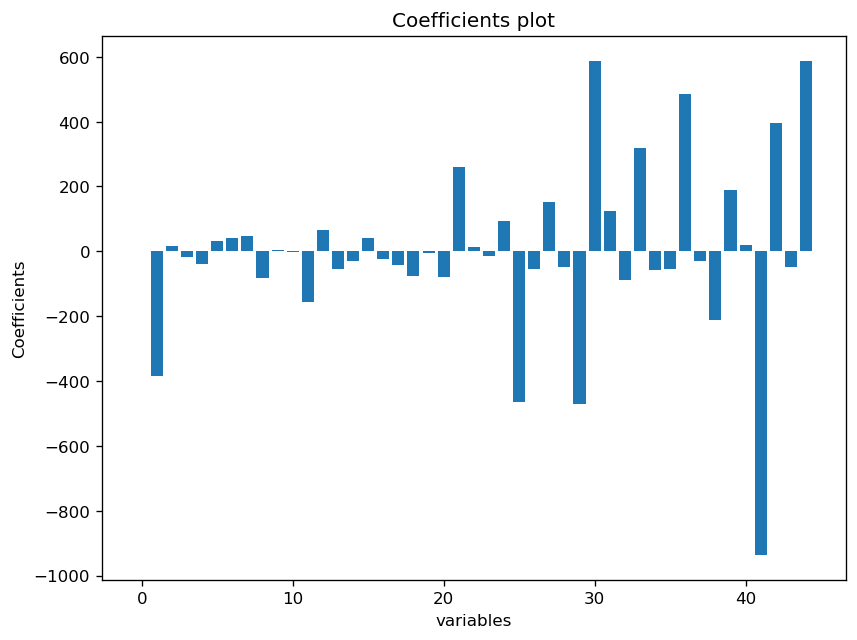

In [7]:
# plotting the coefficients
plt.figure(figsize=(8,6),dpi=120,facecolor='w',edgecolor='b')
x2=range(len(train_x.columns))
y2=lr.coef_
plt.bar(x2,y2)
plt.xlabel("variables")
plt.ylabel('Coefficients')
plt.title('Coefficients plot')

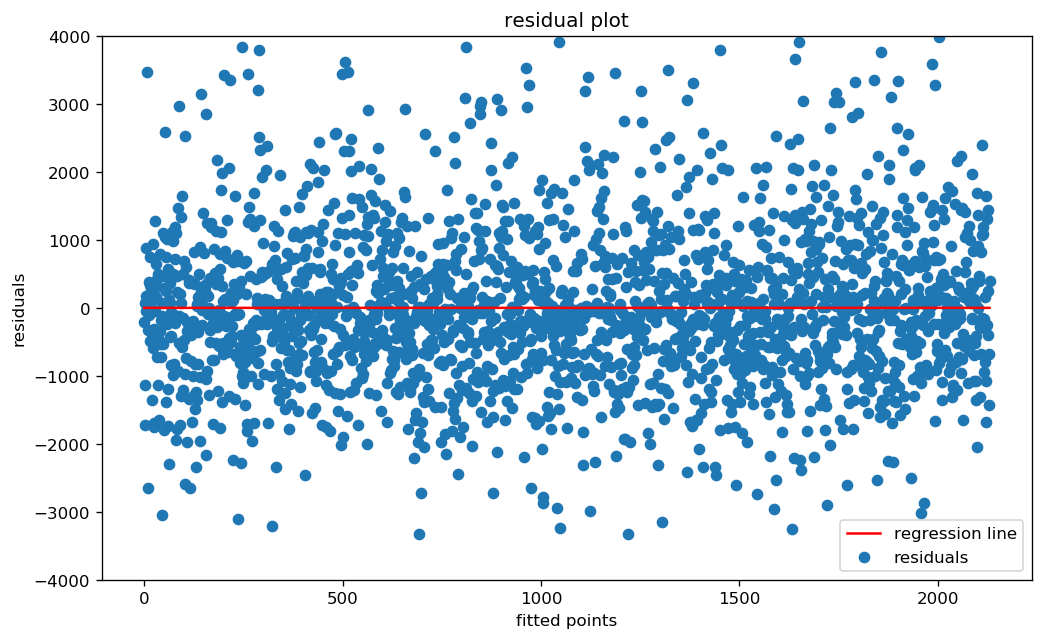

In [8]:
residuals=pd.DataFrame({
    'fitted values':test_y,
    'predicted values':test_predict,
})
residuals['residuals']=residuals['fitted values']-residuals['predicted values']
plt.figure(figsize=(10,6),dpi=120,facecolor='w',edgecolor='b')
f=range(0,2131)
k=[0 for i in range(0,2131)]
plt.scatter(f,residuals.residuals[:],label='residuals')
plt.plot(f,k,color='red',label='regression line')
plt.xlabel('fitted points')
plt.ylabel('residuals')
plt.title('residual plot')
plt.ylim(-4000,4000)
plt.legend()
# there is no correlation between residuals and errors have constant variance i.e. homoscedastic.

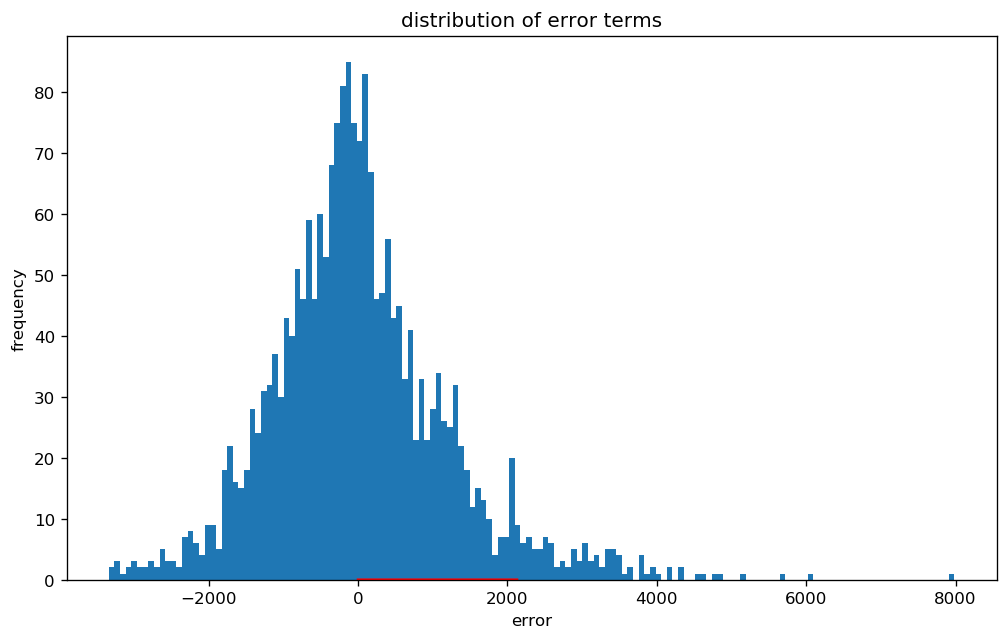

In [9]:
# checking distribution of residuals
plt.figure(figsize=(10,6),dpi=120,facecolor='w',edgecolor='b')
plt.hist(residuals.residuals,bins=150)
plt.plot(f,k,color='red',label='regression line')
plt.xlabel('error')
plt.ylabel('frequency')
plt.title('distribution of error terms')
plt.show()
# residuals follow normal distribution.

In [10]:
lr=LR(normalize=True)
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [11]:
train_predict=lr.predict(train_x)
k=mae(train_predict,train_y)
print('Training mean absolute error  ',k)

Training mean absolute error   819.7964175844807


In [12]:
test_predict=lr.predict(test_x)
k=mae(test_predict,test_y)
print('Testing mean absolute error  ',k)

Testing mean absolute error   871.6221818864383


In [13]:
# creating a new subset of significant variables
Coefficients=pd.DataFrame({
    'Variable':x.columns,
    'coefficient':lr.coef_
})
sig_var=Coefficients[Coefficients.coefficient>0.5]
subset=data[sig_var['Variable'].values]

In [14]:
from sklearn.model_selection import train_test_split
train_x3,test_x3,train_y3,test_y3=train_test_split(subset,y,random_state=56)

In [15]:
lr=LR(normalize=True)
lr.fit(train_x3,train_y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [16]:
train_predict=lr.predict(train_x3)
k=mae(train_predict,train_y3)
print('Training mean absolute error  ',k)

Training mean absolute error   821.5266373904882


In [17]:
test_predict=lr.predict(test_x3)
k=mae(test_predict,test_y3)
print('Testing mean absolute error  ',k)

Testing mean absolute error   874.6852598779916


Text(0.5, 1.0, 'Normalized Coefficients plot')

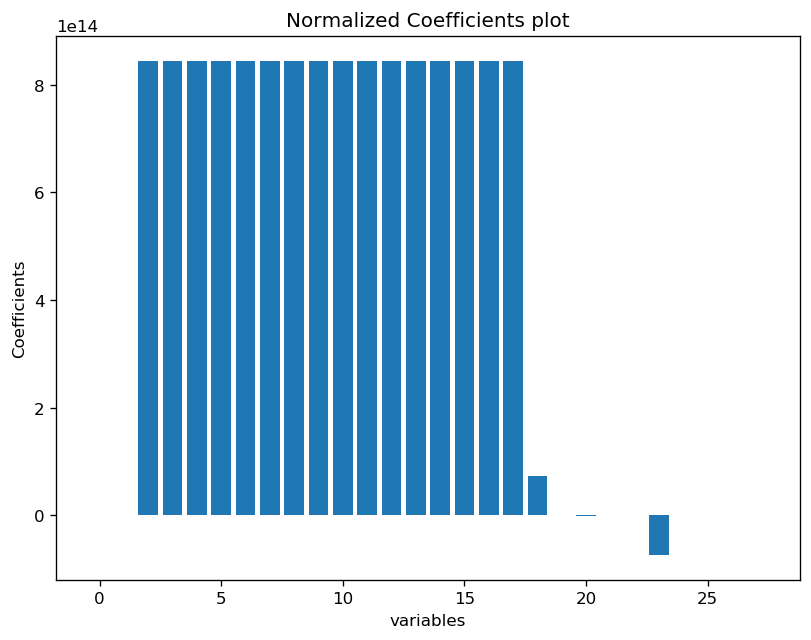

In [18]:
plt.figure(figsize=(8,6),dpi=120,facecolor='w',edgecolor='b')
x3=range(len(train_x3.columns))
y3=lr.coef_
plt.bar(x3,y3)
plt.xlabel("variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficients plot')

In [20]:
# KNN 
features=data.drop(['Item_Outlet_Sales'],axis=1)
target=data['Item_Outlet_Sales']

In [21]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x=pd.DataFrame(x_scaled)

In [24]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=56)

In [25]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [26]:
reg=KNN(n_neighbors=5)

reg.fit(train_x,train_y)

test_predict=reg.predict(test_x)
k=mse(test_predict,test_y)
print('Test MSE  ',k)

Test MSE   1714854.6015010108


In [27]:
# elbow for classifier
def Elbow(k):
    
    test_mse=[]
    for i in k:
        reg=KNN(n_neighbors=i)
        reg.fit(train_x,train_y)
    
        tmp=reg.predict(test_x)
        tmp=mse(tmp,test_y)
        test_mse.append(tmp)
    return test_mse

In [28]:
k=range(1,40)
test=Elbow(k)

Text(0.5, 1.0, 'Elbow curve for test')

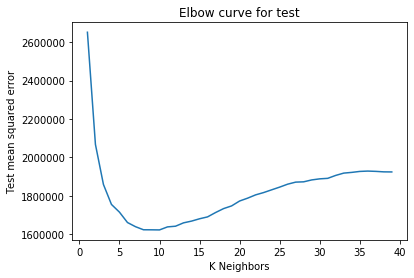

In [29]:
plt.plot(k,test)
plt.xlabel('K Neighbors')
plt.ylabel('Test mean squared error')
plt.title('Elbow curve for test')

In [32]:
reg=KNN(n_neighbors=9)
reg.fit(train_x,train_y)
test_predict=reg.predict(test_x)
k=mse(test_predict,test_y)
print('Test mse  ',k)

Test mse   1622957.615752187
